In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from itertools import compress
print(tf.version.VERSION)

2.8.0


In [2]:
model =  keras.models.load_model("trained.model")

In [3]:
IMG_HEIGHT = 20
IMG_WIDTH = 20

In [5]:
normal_image_gen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)
test_data_gen = normal_image_gen.flow_from_directory(batch_size=5193,
                                                     directory="all_data",
                                                     color_mode="grayscale",
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 3096 images belonging to 9 classes.


In [6]:
test_images, test_labels = next(test_data_gen)
filenames = test_data_gen.filenames
test_pred = model.predict(test_images)

In [7]:
true_labels = tf.argmax(test_labels,1)

In [8]:
predicted_labels = tf.argmax(test_pred,1)

In [9]:
wrong = (true_labels != predicted_labels)

In [10]:
wrong_images = test_images[wrong]
wrong_true_labels = true_labels[wrong]
wrong_prediced_labels = predicted_labels[wrong]
print(f"Got {wrong_images.shape[0]} wrong")
wrong_filenames = list(compress(filenames, wrong))
print(wrong_filenames)

Got 1 wrong
['4\\1173.png']


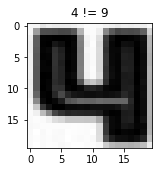

In [11]:
def plot_images(images, true_labels, pred_labels):
    fig = plt.figure(figsize=(13, 15))
    columns = 5
    rows = 5

    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(min(images.shape[0], columns*rows)):
        img = images[i]
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        ax[-1].set_title(f"{true_labels[i]+1} != {pred_labels[i]+1}")
        plt.imshow(img.reshape(IMG_WIDTH, IMG_HEIGHT), cmap="gray")
    
    plt.show()

plot_images(wrong_images, wrong_true_labels, wrong_prediced_labels)